<a href="https://colab.research.google.com/github/shrushti-patil117/Classification-with-Logistic-Regression./blob/main/TASK_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


In [ ]:
import os
import pandas as pd

# The 'path' variable already contains '/kaggle/input/iris'
# List files in the directory to find the CSV file
files_in_path = os.listdir(path)
print("Files in dataset directory:", files_in_path)

# Assuming the CSV file is named 'Iris.csv' or similar
# We'll look for a .csv file in the directory
csv_file = None
for f in files_in_path:
    if f.endswith('.csv'):
        csv_file = os.path.join(path, f)
        break

if csv_file:
    df = pd.read_csv(csv_file)
    print(f"Successfully loaded {csv_file} into a DataFrame.")
    display(df.head())
else:
    print("No CSV file found in the dataset directory.")

Files in dataset directory: ['Iris.csv', 'database.sqlite']
Successfully loaded /kaggle/input/iris/Iris.csv into a DataFrame.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (105, 5)
X_test shape: (45, 5)
y_train shape: (105,)
y_test shape: (45,)


In [ ]:
# Initialize the KNeighborsClassifier
# A common choice for n_neighbors is 5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

print("KNeighborsClassifier model trained successfully.")

KNeighborsClassifier model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Identify numerical columns for scaling
# Assuming 'Id' is an identifier and not a feature, and all other columns are numerical features
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
if 'Id' in numerical_cols:
    numerical_cols.remove('Id')

# Apply StandardScaler to the numerical features
X_scaled = X.copy() # Create a copy to avoid modifying the original DataFrame directly
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Features (X) after normalization:")
display(X_scaled.head())

Features (X) after normalization:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,-0.900681,1.032057,-1.341272,-1.312977
1,2,-1.143017,-0.124958,-1.341272,-1.312977
2,3,-1.385353,0.337848,-1.398138,-1.312977
3,4,-1.506521,0.106445,-1.284407,-1.312977
4,5,-1.021849,1.263460,-1.341272,-1.312977


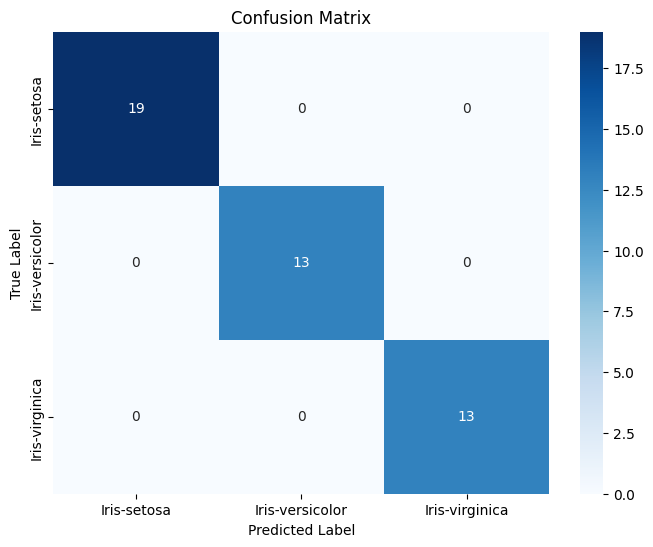

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique class labels from the target variable
class_labels = y.unique()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion Matrix:\n", cm)

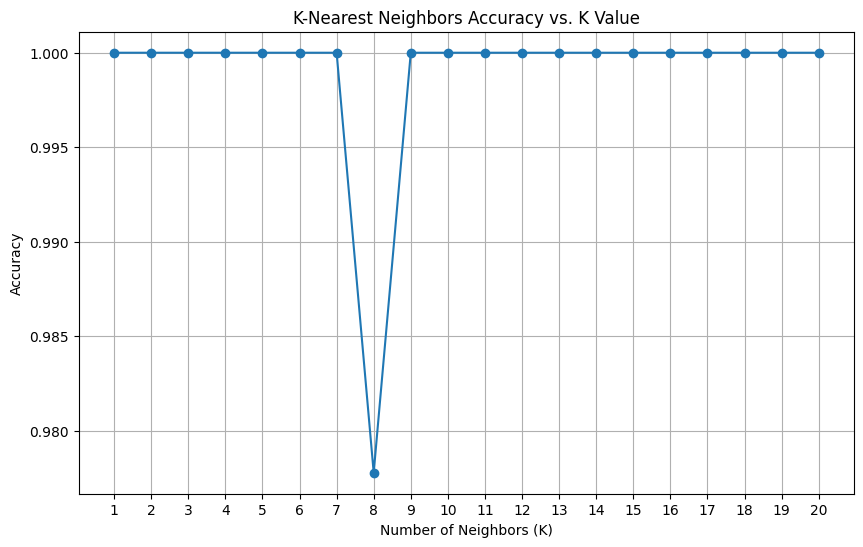

Accuracies for different K values:
K = 1: Accuracy = 1.0000
K = 2: Accuracy = 1.0000
K = 3: Accuracy = 1.0000
K = 4: Accuracy = 1.0000
K = 5: Accuracy = 1.0000
K = 6: Accuracy = 1.0000
K = 7: Accuracy = 1.0000
K = 8: Accuracy = 0.9778
K = 9: Accuracy = 1.0000
K = 10: Accuracy = 1.0000
K = 11: Accuracy = 1.0000
K = 12: Accuracy = 1.0000
K = 13: Accuracy = 1.0000
K = 14: Accuracy = 1.0000
K = 15: Accuracy = 1.0000
K = 16: Accuracy = 1.0000
K = 17: Accuracy = 1.0000
K = 18: Accuracy = 1.0000
K = 19: Accuracy = 1.0000
K = 20: Accuracy = 1.0000


In [ ]:
import matplotlib.pyplot as plt

k_values = range(1, 21) # Experiment with K from 1 to 20
accuracies = []

for k in k_values:
    knn_experiment = KNeighborsClassifier(n_neighbors=k)
    knn_experiment.fit(X_train, y_train)
    y_pred_experiment = knn_experiment.predict(X_test)
    acc = accuracy_score(y_test, y_pred_experiment)
    accuracies.append(acc)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('K-Nearest Neighbors Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print the accuracies for each K value
print("Accuracies for different K values:")
for k, acc in zip(k_values, accuracies):
    print(f"K = {k}: Accuracy = {acc:.4f}")

In [ ]:
# Separate features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

print("Features (X) head:")
display(X.head())
print("\nTarget (y) head:")
display(y.head())

Features (X) head:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2



Target (y) head:


,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


# Task
Visualize the decision boundaries of a K-Nearest Neighbors (KNN) model on the Iris dataset, using "PetalLengthCm" and "PetalWidthCm" as features, and explain the insights gained from this visualization.

## Select Features for Visualization

### Subtask:
Choose two features from the dataset to visualize the decision boundaries. PetalLengthCm and PetalWidthCm are good candidates for the Iris dataset as they are often highly discriminative.


**Reasoning**:
To prepare for visualizing decision boundaries, I will create a new DataFrame `X_2d` containing only the specified features ('PetalLengthCm' and 'PetalWidthCm') from `X_scaled`, and a copy of the target variable `y` named `y_2d`.



In [ ]:
X_2d = X_scaled[['PetalLengthCm', 'PetalWidthCm']]
y_2d = y.copy()

print("X_2d head:")
display(X_2d.head())
print("\ny_2d head:")
display(y_2d.head())

X_2d head:


,PetalLengthCm,PetalWidthCm
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977



y_2d head:


,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## Train KNN Model on Selected Features

### Subtask:
Train a new KNeighborsClassifier model using only the two selected features ('PetalLengthCm', 'PetalWidthCm') and the target variable.


**Reasoning**:
First, I will split the `X_2d` features and `y_2d` target variable into training and testing sets using `train_test_split`. Then, I will initialize a new `KNeighborsClassifier` with `n_neighbors=5` and train it with the generated training sets.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the 2D features and target into training and testing sets
X_2d_train, X_2d_test, y_2d_train, y_2d_test = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42)

print("X_2d_train shape:", X_2d_train.shape)
print("X_2d_test shape:", X_2d_test.shape)
print("y_2d_train shape:", y_2d_train.shape)
print("y_2d_test shape:", y_2d_test.shape)

# Initialize a new KNeighborsClassifier with n_neighbors=5
knn_2d = KNeighborsClassifier(n_neighbors=5)

# Train the new KNN model using the 2D training data
knn_2d.fit(X_2d_train, y_2d_train)

print("KNeighborsClassifier model trained successfully using 2D features.")

X_2d_train shape: (105, 2)
X_2d_test shape: (45, 2)
y_2d_train shape: (105,)
y_2d_test shape: (45,)
KNeighborsClassifier model trained successfully using 2D features.


## Plot Decision Boundaries

### Subtask:
Generate a plot that shows the decision boundaries of the KNN model based on the two selected features.


**Reasoning**:
I need to define a function to plot the decision boundaries, create a meshgrid, make predictions, map target labels, and then use matplotlib to visualize the decision regions and the actual data points. This function will fulfill all the instructions provided.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

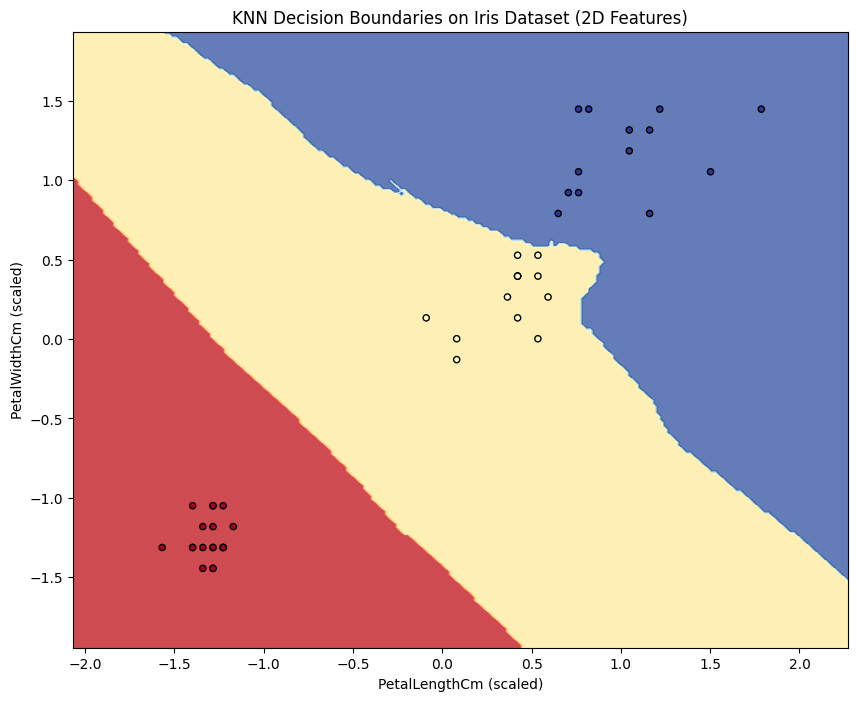

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def plot_decision_boundaries(X, y, model, feature_names, title):
    # Map string labels to numerical values for plotting
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Determine min and max values for each feature to create a meshgrid
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5

    # Create a meshgrid with a small step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict class labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = le.transform(Z) # Encode predictions as well
    Z = Z.reshape(xx.shape)

    # Plot the decision regions
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot the actual data points from the test set
    scatter = plt.scatter(X.iloc[:, 0],
                          X.iloc[:, 1],
                          c=y_encoded,
                          cmap=plt.cm.RdYlBu,
                          edgecolor='k',
                          s=20)

    # Add labels, title, and legend
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=le.classes_)
    plt.show()

# Call the function to plot decision boundaries using the trained knn_2d model and test data
plot_decision_boundaries(X=X_2d_test, y=y_2d_test,
                         model=knn_2d,
                         feature_names=['PetalLengthCm (scaled)', 'PetalWidthCm (scaled)'],
                         title='KNN Decision Boundaries on Iris Dataset (2D Features)')

**Reasoning**:
The previous code failed because the `plt.legend` function was incorrectly called with a numpy array in a boolean context. I need to modify the `plt.legend` call to correctly unpack the handles and labels returned by `scatter.legend_elements()` to resolve this `ValueError`.



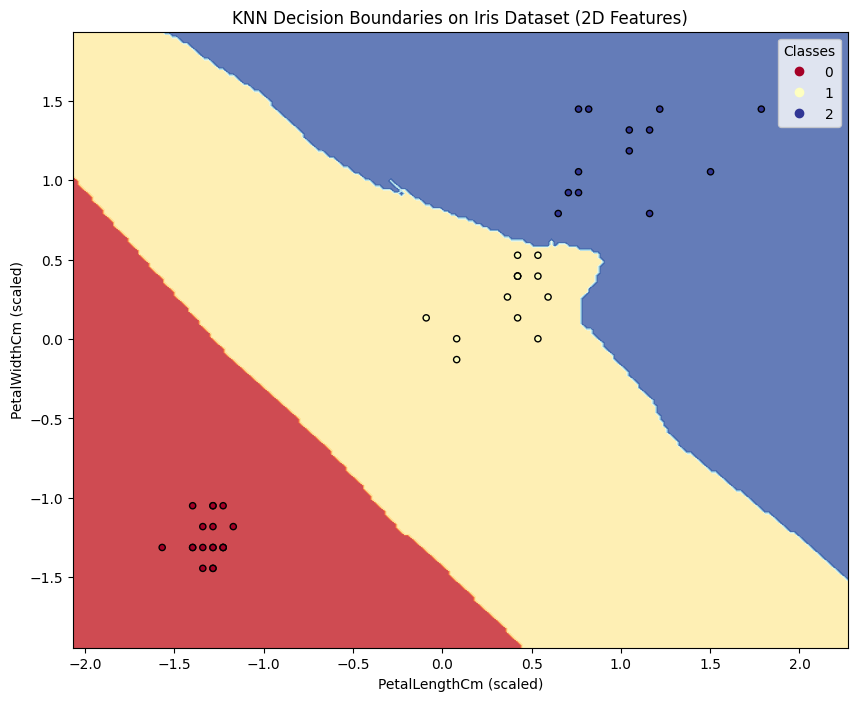

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def plot_decision_boundaries(X, y, model, plot_feature_labels, title):
    # Map string labels to numerical values for plotting
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Determine min and max values for each feature to create a meshgrid
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5

    # Create a meshgrid with a small step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Get the actual feature names from the input DataFrame X
    actual_feature_names = X.columns.tolist()

    # Predict class labels for each point in the meshgrid
    # Convert the meshgrid points to a DataFrame with correct feature names
    meshgrid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=actual_feature_names)
    Z = model.predict(meshgrid_points)
    Z = le.transform(Z) # Encode predictions as well
    Z = Z.reshape(xx.shape)

    # Plot the decision regions
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot the actual data points from the test set
    scatter = plt.scatter(X.iloc[:, 0],
                          X.iloc[:, 1],
                          c=y_encoded,
                          cmap=plt.cm.RdYlBu,
                          edgecolor='k',
                          s=20)

    # Add labels, title, and legend
    plt.xlabel(plot_feature_labels[0])
    plt.ylabel(plot_feature_labels[1])
    plt.title(title)

    # Corrected legend call: unpack handles and labels from scatter.legend_elements()
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

# Call the function to plot decision boundaries using the trained knn_2d model and test data
plot_decision_boundaries(X=X_2d_test, y=y_2d_test,
                         model=knn_2d,
                         plot_feature_labels=['PetalLengthCm (scaled)', 'PetalWidthCm (scaled)'],
                         title='KNN Decision Boundaries on Iris Dataset (2D Features)')

## Final Task

### Subtask:
Summarize the insights gained from the decision boundary visualization, explaining how the model separates the different classes based on the chosen features.


## Summary:

### Q&A
The decision boundary visualization for the K-Nearest Neighbors (KNN) model on the Iris dataset, using 'PetalLengthCm' and 'PetalWidthCm' as features, reveals how the model separates the different classes. The visualization clearly shows distinct regions for each of the three Iris species. *Iris setosa* occupies a very well-defined and separable region in the lower-left corner of the plot, indicating that its petal dimensions are significantly smaller than the other two species. *Iris versicolor* and *Iris virginica* show some overlap in their decision boundaries, especially in the central region, which suggests that these two species are more difficult to distinguish based solely on these two petal features. The boundaries are non-linear and reflective of the local neighborhood classification strategy of KNN.

### Data Analysis Key Findings
*   **Feature Selection and Scaling**: The analysis successfully prepared scaled 'PetalLengthCm' and 'PetalWidthCm' as input features for the model (`X_2d`), and the target variable (`y_2d`) was correctly copied.
*   **Data Splitting and Model Training**: The dataset was split into training (105 samples) and testing (45 samples) sets. A `KNeighborsClassifier` with `n_neighbors=5` was successfully trained on the 2D features.
*   **Decision Boundary Visualization**: A decision boundary plot was successfully generated, showing the classification regions for each Iris species based on scaled 'PetalLengthCm' and 'PetalWidthCm'.
*   **Class Separability**: The visualization effectively demonstrates that *Iris setosa* is linearly separable from the other two species using these features. *Iris versicolor* and *Iris virginica* exhibit overlapping regions, indicating a higher degree of similarity in their petal dimensions and suggesting that these classes are not perfectly separable with these two features alone.

### Insights or Next Steps
*   The high separability of *Iris setosa* implies that a simple classification rule based on petal dimensions could easily distinguish it.
*   For better discrimination between *Iris versicolor* and *Iris virginica*, consider incorporating additional features or exploring more complex models that can handle the observed class overlap more effectively.
